## EDA on Welltory COVID-19 and Wearables Open Data Research dataset

* authors: Zihao Yang, Tony Wang
* Date: 09/22/2024
* Reference: https://github.com/Welltory/hrv-covid19/tree/master

In [1]:
# import dependencies
import pandas as pd
import os

### Data Organization

In [2]:
# extract data from .csv file to pandas dataframe

blood_pressure=pd.read_csv('data/blood_pressure.csv').sort_values(by='user_code')
heart_rate=pd.read_csv('data/heart_rate.csv').sort_values(by='user_code')
hrv_measurements=pd.read_csv('data/hrv_measurements.csv').sort_values(by='user_code')
participants=pd.read_csv('data/participants.csv').sort_values(by='user_code')
scales_description=pd.read_csv('data/scales_description.csv')
sleep=pd.read_csv('data/sleep.csv').sort_values(by='user_code')
surveys=pd.read_csv('data/surveys.csv').sort_values(by='user_code')
wearables=pd.read_csv('data/wearables.csv').sort_values(by='user_code')
weather=pd.read_csv('data/weather.csv').sort_values(by='user_code')



### 1. Data context and Datasampling

#### Data Context
* Source of the data:  
  Those data includes symptoms, heart rate variability and data of users with positive COVID-19 status. Details are as follows:
  (1) Heart rate variability measurements: Those measurements are from Bluetooth-enabled heart rate monitor or with PPG.
  (2) User-connected gadgets: Those data are from devices such as Apple Watch and Garmin that sync with Google Fit or Apple Health.
  (3) Clinically validated physical and mental health assessments data: Those data are from people adding information about symptoms and test results to a feature specifically for the project.
* Time Period when the data was collected: From 12/31/2019 to 06/19/2020
* Conditions and assumptions of data collection: COVID-19 Epidemic
* Purpose of collecting the data: To detect patterns regarding the COVID-19 disease; progression and recovery.

#### Data Sampling
* Source of the data:   
  (1) Purposive Sampling: Researchers choose users with positive COVID-19 status as data point because they think health data from those individuals are more representive or informative.    
  (2) Convenience Sampling: Researchers choose data from Welltory App uploaded by users because of their convenient accessibility and proximity.


### 2. Explore and Intepret data structure, descriptive statistics, data quality and varaible relationships


#### DataFrame Strucutre

In [3]:
# Blood Pressure Column Info
print("blood_pressure:",blood_pressure.info())

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 0 to 720
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_code                 721 non-null    object 
 1   measurement_datetime      721 non-null    object 
 2   diastolic                 721 non-null    int64  
 3   systolic                  721 non-null    int64  
 4   functional_changes_index  299 non-null    float64
 5   circulatory_efficiency    299 non-null    float64
 6   kerdo_vegetation_index    283 non-null    float64
 7   robinson_index            299 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 50.7+ KB
blood_pressure: None


This interpretes the data structure of blood pressure table. From the info above, we know that usercode(Unique user ID) and measurement_datetime(measurement datetime in YYYY-MM-DD hh:mm:ss format) are object, and diastolic(Diastolic blood pressure) and systolic(Systolic blood pressure) are int, and functional_changes_index(FCI blood index), circulatory_efficiency(BCE blood index), kerdo_vegetation_index(Kerdo index) and robinson_index(Robinson’s index) are all index indicating conditions of blood pressure and they are all float.

In [4]:
# Heart Rate Column Info
print("heart_rate:",heart_rate.info())

<class 'pandas.core.frame.DataFrame'>
Index: 523783 entries, 0 to 523782
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_code   523783 non-null  object
 1   datetime    523783 non-null  object
 2   heart_rate  523783 non-null  int64 
 3   is_resting  523783 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 20.0+ MB
heart_rate: None


This interpretes the data structure of heart rate. From the info above, we know that usercode, datetime are object and heart_rate is the number of times the heart beats within a certain time period, usually a minute, so it is int. And is_resting is an indicator indicating whether the user is resting or not when measuring the blood pressure. 1 indicates resting and 0 indicates not.

In [5]:
# HRV Measurements Column Info
print("hrv_measurements:",hrv_measurements.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3245 entries, 0 to 3244
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             3245 non-null   object 
 1   rr_code               3245 non-null   object 
 2   measurement_datetime  3245 non-null   object 
 3   time_of_day           3245 non-null   object 
 4   bpm                   3245 non-null   int64  
 5   meanrr                3245 non-null   float64
 6   mxdmn                 3245 non-null   float64
 7   sdnn                  3245 non-null   float64
 8   rmssd                 3245 non-null   float64
 9   pnn50                 3245 non-null   float64
 10  mode                  3245 non-null   float64
 11  amo                   3245 non-null   float64
 12  lf                    3245 non-null   float64
 13  hf                    3245 non-null   float64
 14  vlf                   3245 non-null   float64
 15  lfhf                  3245

This interpretes the data structure of hrv measurements. From the info above, we know that user_code, rr_code (Unique measurement ID), measurement_datetime and time_of_day('Time of day: 'evening', 'morning', 'night' or 'day') are all objects. And bpm is average heart rate beat per minute, a int. How_feel and how_mood are levels of users' feel and mood in integer format and how_sleep is a level of users sleep condition in float format. Tags are assigned by user as a comma-separated string, so it is a object. rr_data are intervals in milliseconds between consecutive heart beats as a comma-separated string. All other columns are health data in float formats.

In [6]:
# Participants Column Info
print("participants:",participants.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_code       185 non-null    object 
 1   gender          185 non-null    object 
 2   age_range       185 non-null    object 
 3   city            173 non-null    object 
 4   country         179 non-null    object 
 5   height          183 non-null    float64
 6   weight          185 non-null    float64
 7   symptoms_onset  147 non-null    object 
dtypes: float64(2), object(6)
memory usage: 11.7+ KB
participants: None


This intepretes the data structure in participates. From the info above, we know that user_code, gender, age_range, city, country are some information of this user in object formats. Symptoms_onset is the onset date of the symptoms of the disease which format is MM/DD/YYYY. Height and weight are information of this user in a float format.

In [7]:
# Scales Description Column Info
print("scales_description:",scales_description.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Scale        148 non-null    object
 1   Description  148 non-null    object
 2   Value        148 non-null    int64 
 3   Meaning      148 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB
scales_description: None


This intepretes the data structure in scales_description. From the info above, scale is a Survey code in an object format. Decription is a string to describe the meaning of the scale. Value is an integer indicating a score of the scale and meaning is a string describing the meaning of value of the score.

In [8]:
# Sleep Column Info
print("sleep:",sleep.info())

<class 'pandas.core.frame.DataFrame'>
Index: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             425 non-null    object 
 1   day                   425 non-null    object 
 2   sleep_begin           425 non-null    object 
 3   sleep_end             425 non-null    object 
 4   sleep_duration        425 non-null    float64
 5   sleep_awake_duration  9 non-null      float64
 6   sleep_rem_duration    7 non-null      float64
 7   sleep_light_duration  27 non-null     float64
 8   sleep_deep_duration   14 non-null     float64
 9   pulse_min             15 non-null     float64
 10  pulse_max             15 non-null     float64
 11  pulse_average         15 non-null     float64
dtypes: float64(8), object(4)
memory usage: 43.2+ KB
sleep: None


This intepretes the data structure in sleep table. From the info above, we know that user_code, day(measurement date in YYYY-MM-DD format), sleep_begin(sleep_start_date and time in YYYY-MM-DD hh:mm:ss format), sleep_end(sleep_end_date and time in YYYY-MM-DD hh:mm:ss format) are all object formats. Other data are sleep condition data in float format.

In [9]:
# Suverys Column Info
print("surveys:",surveys.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2259 entries, 0 to 2258
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_code   2259 non-null   object
 1   scale       2259 non-null   object
 2   created_at  2259 non-null   object
 3   value       2259 non-null   int64 
 4   text        2259 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.9+ KB
surverys: None


This intepretes the data structure in surveys table. From the info above, we know that the user_code, scale(described in scales_description table), created_at(date when user took the survey in YYYY-MM-DD format) and text(text interpretation of user's result) are all in object formats. Value(User's result) is in int format.

In [10]:
# Wearables Column Info
print("wearables:",wearables.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3098 entries, 0 to 3097
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_code                        3098 non-null   object 
 1   day                              3098 non-null   object 
 2   resting_pulse                    1515 non-null   float64
 3   pulse_average                    2089 non-null   float64
 4   pulse_min                        2089 non-null   float64
 5   pulse_max                        2089 non-null   float64
 6   average_spo2_value               40 non-null     float64
 7   body_temperature_avg             65 non-null     float64
 8   stand_hours_total                531 non-null    float64
 9   steps_count                      1968 non-null   float64
 10  distance                         1869 non-null   float64
 11  steps_speed                      1418 non-null   float64
 12  total_number_of_flights_c

This intepretes the data structure in wearables table. From the info above, we know that the user_code, day(measurement date in YYYY-MM-DD format) are in object formats. And other values are health data measured in wearable devices in a float format.

In [11]:
# Weather Column Info
print("weather:",weather.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1717 entries, 0 to 1716
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             1717 non-null   object 
 1   day                   1717 non-null   object 
 2   avg_temperature_C     1717 non-null   float64
 3   atmospheric_pressure  1717 non-null   float64
 4   precip_intensity      1717 non-null   float64
 5   humidity              1717 non-null   float64
 6   clouds                1717 non-null   float64
dtypes: float64(5), object(2)
memory usage: 107.3+ KB
weather: None


This intepretes the data structure in weather data. From the info above, we know that the user_code and day(Measurement date in YYYY-MM-DD format) are in object formats. And other values are indexes measuring the weather of the day in float formats.

#### Descriptive Statistics

For descriptive Statistics analysis, we analyse int and float data, and get count, mean, std, min, 25%, 50%, 75% andn max for those data.

In [12]:
# Descriptive Statistics for Blood Pressure
blood_pressure.describe()

,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
count,721.000000,721.000000,299.000000,299.000000,283.000000,299.000000
mean,81.228849,119.441054,2.594013,2735.197057,-15.498233,84.663779
std,8.865761,10.522578,0.291302,747.882570,18.681233,14.399208
min,25.000000,63.000000,1.680000,1300.000000,-76.000000,49.500000
25%,76.000000,113.000000,2.440000,2250.500000,-29.000000,75.580000
50%,82.000000,120.000000,2.580000,2640.000000,-17.000000,83.220000
75%,88.000000,126.000000,2.730000,3076.500000,-5.000000,93.170000
max,101.000000,157.000000,3.510000,7875.000000,45.000000,164.850000


In [13]:
# Descriptive Statistics for Heart Rate
heart_rate.describe()

,heart_rate,is_resting
count,523783.000000,523783.000000
mean,90.856626,0.005546
std,25.054152,0.074266
min,10.000000,0.000000
25%,71.000000,0.000000
50%,87.000000,0.000000
75%,108.000000,0.000000
max,232.000000,1.000000


In [14]:
# Descriptive Statistics for HRV Measurements
hrv_measurements.describe()

,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep
count,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,1466.000000
mean,73.257935,839.600366,0.184635,52.489218,52.814196,20.615609,0.837465,46.788290,927.038213,1125.041294,578.229892,2.397769,2630.309399,-0.235439,-0.076733,-0.065484
std,12.201088,137.420367,0.107456,29.369506,39.353213,18.588156,0.144769,16.418873,1455.424089,2490.540413,876.679652,5.750760,3912.247496,0.706262,0.655032,0.708656
min,44.000000,477.730000,0.030000,9.515000,6.340000,0.000000,0.475000,12.000000,2.000000,4.000000,1.000000,0.032000,44.000000,-2.000000,-2.000000,-2.000000
25%,65.000000,742.490000,0.110000,32.585000,28.985000,6.060000,0.725000,35.000000,151.000000,158.000000,116.000000,0.399000,620.000000,-1.000000,0.000000,0.000000
50%,72.000000,829.100000,0.160000,46.919000,42.869000,16.160000,0.825000,45.000000,423.000000,380.000000,293.000000,0.862000,1387.000000,0.000000,0.000000,0.000000
75%,81.000000,925.933000,0.220000,64.406000,62.485000,29.290000,0.925000,57.000000,1059.000000,993.000000,693.000000,1.966000,2906.000000,0.000000,0.000000,0.000000
max,125.000000,1346.740000,0.790000,206.631000,310.800000,91.920000,1.325000,98.000000,15522.000000,33490.000000,18468.000000,105.625000,41118.000000,2.000000,2.000000,2.000000


In [15]:
# Descriptive Statistics for Participants
participants.describe()

,height,weight
count,183.000000,185.000000
mean,169.976393,77.927757
std,12.400103,19.552541
min,132.080000,43.500000
25%,163.500000,63.500000
50%,168.000000,74.344000
75%,174.500000,90.537000
max,250.000000,154.221000


In [16]:
# Describe Scales Description
scales_description.describe()

,Value
count,148.000000
mean,2.331081
std,1.655288
min,1.000000
25%,1.000000
50%,1.500000
75%,3.250000
max,6.000000


In [17]:
# Describe Sleep
sleep.describe()

,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
count,425.000000,9.000000,7.000000,27.000000,14.000000,15.000000,15.000000,15.000000
mean,25699.731765,2733.333333,6518.571429,14514.740741,4280.285714,60.533333,89.866667,68.880733
std,7773.805470,671.900290,2081.613385,8078.126290,2089.766547,12.844491,10.541528,10.947268
min,930.000000,1740.000000,2820.000000,300.000000,480.000000,52.000000,62.000000,59.444000
25%,21857.000000,2460.000000,5730.000000,7995.000000,2797.500000,54.500000,85.000000,63.393000
50%,26041.000000,2490.000000,6240.000000,17340.000000,4230.000000,58.000000,93.000000,65.857000
75%,30600.000000,2790.000000,8190.000000,20340.000000,5550.000000,60.000000,94.500000,70.250000
max,47460.000000,4200.000000,8730.000000,23100.000000,7934.000000,105.000000,105.000000,105.000000


In [18]:
# Describe Surveys
surveys.describe()

,value
count,2259.000000
mean,2.364763
std,1.554934
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,6.000000


In [19]:
# Describe Wearables
wearables.describe()

,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
count,1515.000000,2089.000000,2089.000000,2089.000000,40.00000,65.000000,531.000000,1968.000000,1869.000000,1418.000000,1235.000000,1200.000000,3097.000000,3097.00000,230.000000,149.000000
mean,61.409241,78.084251,63.078506,99.456199,0.96100,36.404615,8.986817,5342.067581,3494.690744,29.700409,16.202429,750.721667,2258.165644,2549.04908,64.027348,54.406040
std,12.775324,14.366994,14.334455,29.298930,0.02134,0.239394,5.030643,4761.774987,3599.635544,28.068371,20.799798,915.538000,341.462086,804.62248,14.525733,7.028195
min,40.000000,48.000000,10.000000,48.000000,0.92000,35.800000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,81.000000,81.00000,11.650000,31.560000
25%,52.000000,69.000000,53.000000,76.000000,0.94750,36.200000,4.000000,1456.000000,772.000000,10.400000,3.000000,66.000000,1968.000000,2001.00000,53.607500,52.020000
50%,58.000000,76.000000,60.000000,96.000000,0.96000,36.400000,10.000000,4477.500000,2687.000000,24.575000,9.000000,180.000000,2271.000000,2353.00000,64.395000,55.150000
75%,69.000000,85.000000,72.000000,118.000000,0.98000,36.600000,13.000000,7857.250000,5035.000000,44.097500,22.000000,1597.000000,2569.000000,2668.00000,75.215000,57.180000
max,109.000000,163.000000,122.000000,225.000000,0.99000,36.900000,19.000000,30882.000000,43914.000000,240.000000,164.000000,5423.000000,3395.000000,8418.00000,92.900000,73.160000


In [20]:
# Describe Weather
weather.describe()

,avg_temperature_C,atmospheric_pressure,precip_intensity,humidity,clouds
count,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000
mean,11.839221,1014.111639,0.003803,66.376586,56.401734
std,7.769565,8.356792,0.015348,19.339670,35.048917
min,-13.150000,984.300000,0.000000,3.000000,0.000000
25%,6.472200,1009.000000,0.000000,54.000000,24.500000
50%,11.272200,1014.100000,0.000200,68.000000,61.500000
75%,16.663900,1019.566700,0.001700,81.000000,91.000000
max,44.072200,1047.750000,0.256700,100.000000,100.000000


#### Data Quality

For data quality analysis, we conducted the completeness(missing values), consistency, timeliness, uniqueness, relevance, validity. Due to the large number of files, for each part of analysis of data quality, I selected two dataset for analysis.

##### Completeness

In [21]:
# Check for missing values in blood pressure
print(blood_pressure.isnull().sum())
missing_percentage = (blood_pressure.isnull().sum() / len(blood_pressure))
print(missing_percentage)

user_code                     0
measurement_datetime          0
diastolic                     0
systolic                      0
functional_changes_index    422
circulatory_efficiency      422
kerdo_vegetation_index      438
robinson_index              422
dtype: int64
user_code                   0.000000
measurement_datetime        0.000000
diastolic                   0.000000
systolic                    0.000000
functional_changes_index    0.585298
circulatory_efficiency      0.585298
kerdo_vegetation_index      0.607490
robinson_index              0.585298
dtype: float64


There are 0 missing value in user_code, measurement_datetime, diastolic and systolic column, indicating that those columns have complete data.   
There are 422 missing values in functional_changes_index, 422 in circulatory_efficiency, 438 in kerdo_vegetation_index and 422 in robinson_index, and the missing_value percentage in those 4 columns are 0.585, 0.585, 0.607, 0.585


In [22]:
# Check for missing values in heart rate
print(heart_rate.isnull().sum())
missing_percentage = (heart_rate.isnull().sum() / len(heart_rate))
print(missing_percentage)

user_code     0
datetime      0
heart_rate    0
is_resting    0
dtype: int64
user_code     0.0
datetime      0.0
heart_rate    0.0
is_resting    0.0
dtype: float64


There are 0 missing value in each column, indicating that those columns are all complete.

##### Consistency

Data Type Consistency

In [23]:
# check for data type in hrv_measurements

print(hrv_measurements.dtypes)

user_code                object
rr_code                  object
measurement_datetime     object
time_of_day              object
bpm                       int64
meanrr                  float64
mxdmn                   float64
sdnn                    float64
rmssd                   float64
pnn50                   float64
mode                    float64
amo                     float64
lf                      float64
hf                      float64
vlf                     float64
lfhf                    float64
total_power             float64
how_feel                  int64
how_mood                  int64
how_sleep               float64
tags                     object
rr_data                  object
dtype: object


Those columns have consistent data types. However, the time_of_day column could be improved by converting it from an object to a datetime format. This will be done in the 5th part in this report.

In [24]:
 # check for data type in participants
print(participants.dtypes)

user_code          object
gender             object
age_range          object
city               object
country            object
height            float64
weight            float64
symptoms_onset     object
dtype: object


Those columns have consistent data types. However, the symptoms_onset column could be improved by converting it from an object to a datetime format. This will be done in the 5th part in this report.

Unique Values and Duplicates

In [25]:
# check for duplicates in hrv_measurements
print(hrv_measurements.duplicated().sum())

for column in hrv_measurements.columns:
    print(column, len(hrv_measurements[column].unique()))

0
user_code 185
rr_code 3245
measurement_datetime 3241
time_of_day 4
bpm 71
meanrr 3134
mxdmn 66
sdnn 3180
rmssd 3174
pnn50 146
mode 18
amo 87
lf 1559
hf 1524
vlf 1283
lfhf 1982
total_power 2275
how_feel 5
how_mood 5
how_sleep 6
tags 1188
rr_data 3245


It shows that there are no duplicate rows in hrv_measurements dataset and there is no column with one unique value which provides useless information.

In [26]:
# check for duplicates in participants
print(participants.duplicated().sum())

for column in participants.columns:
    print(column, len(participants[column].unique()))

0
user_code 185
gender 2
age_range 6
city 117
country 26
height 55
weight 142
symptoms_onset 75


It shows that there are no duplicate rows in participants dataset and there is no column with one unique value which provides useless information.

Outliers

In [27]:
# checkout for outliers in hrv_measurements
numeric_columns = hrv_measurements.select_dtypes(exclude=['object']).columns
for column in numeric_columns:

    Q1 = hrv_measurements[column].quantile(0.25)
    Q3 = hrv_measurements[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers= hrv_measurements[((hrv_measurements[column] < (Q1 - 1.5 * IQR)) | (hrv_measurements[column] > (Q3 + 1.5 * IQR)))][column].sort_values()

    print(column)
    print(outliers)

bpm
281     106
2459    106
2447    106
2577    107
2412    107
2469    107
2589    107
2594    107
1373    107
975     107
2510    107
2603    108
2425    108
2519    109
2550    109
1076    109
2493    110
2612    110
2611    110
2552    110
2468    111
2636    111
2521    116
2582    117
2492    125
Name: bpm, dtype: int64
meanrr
590     1207.93
591     1208.90
964     1209.39
722     1210.55
689     1213.05
654     1245.24
705     1252.65
1246    1273.92
289     1309.56
736     1311.24
737     1336.73
963     1346.74
Name: meanrr, dtype: float64
mxdmn
1336    0.39
1590    0.39
1097    0.39
999     0.39
2934    0.39
        ... 
2342    0.67
2863    0.67
2859    0.67
2912    0.67
2823    0.79
Name: mxdmn, Length: 198, dtype: float64
sdnn
670     112.284
667     112.320
692     113.065
1093    113.262
1022    113.453
         ...   
2863    187.268
2859    187.419
2912    193.519
2823    204.016
2342    206.631
Name: sdnn, Length: 149, dtype: float64
rmssd
2802    112.737
2163    112

This is outliers in hrv_measurements table and in the medical field, outliers are important as they represent extreme medical data, which can be critical when analyzing underlying issues.

In [28]:
# checkout for outliers in participants
numeric_columns = participants.select_dtypes(exclude=['object']).columns

for column in numeric_columns:
    
    Q1 = participants[column].quantile(0.25)
    Q3 = participants[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers= participants[((participants[column] < (Q1 - 1.5 * IQR)) | (participants[column] > (Q3 + 1.5 * IQR)))][column].sort_values()

    print(column)
    print(outliers)

height
65     132.08
136    193.00
175    193.00
83     203.00
49     248.92
102    250.00
Name: height, dtype: float64
weight
24     132.900
109    133.810
137    154.221
Name: weight, dtype: float64


This is outliers in participants table. Outliers in height might present some wrong data because it is highly unusual for people to a height of 248 or 250cm.

#### Accuracy

In [36]:
# check for invalid values in sleep

sleep_tmp=pd.DataFrame()
sleep_tmp['sleep_begin'] = pd.to_datetime(sleep['sleep_begin'])
sleep_tmp['sleep_end'] = pd.to_datetime(sleep['sleep_end'])
sleep_tmp['day'] = pd.to_datetime(sleep['day']).dt.date  # Only keep the date part for comparison

# Check for invalid values based on conditions:
invalid_values = sleep[(sleep['sleep_duration'] < 0) |
                       ((sleep_tmp['sleep_begin'].dt.date < (sleep_tmp['day'] - pd.Timedelta(days=1)))) |
                       (sleep_tmp['sleep_end'].dt.date > (sleep_tmp['day']+pd.Timedelta(days=1))) | 
                       (sleep_tmp['sleep_begin'].dt.date > (sleep_tmp['sleep_end']))]

# Display invalid rows
print(invalid_values)

Empty DataFrame
Columns: [user_code, day, sleep_begin, sleep_end, sleep_duration, sleep_awake_duration, sleep_rem_duration, sleep_light_duration, sleep_deep_duration, pulse_min, pulse_max, pulse_average]
Index: []


It shows that there are no invalid data in sleep and data are intertially no conflicts based on the check the consistence among day, sleep begin time and sleep end time.

In [35]:
# check for invalid values in surveys

merged_survey_participants = pd.merge(surveys, scales_description, left_on=['scale','value'],right_on=['Scale','Value'],how='left')

invalid_values = merged_survey_participants[merged_survey_participants['Meaning'].isnull()]

invalid_values

,user_code,scale,created_at,value,text,Scale,Description,Value,Meaning


It shows that there are no conflicts between surveys and scales description. There are no undefined combination of scale and value in surveys.

#### Timeliness


In [74]:
# check for timeliness in blood pressure

timeliness_test=blood_pressure
timeliness_test['measurement_datetime']=pd.to_datetime(blood_pressure['measurement_datetime'])

timeliness_test = timeliness_test.groupby('user_code').apply(lambda group:group['measurement_datetime'].is_monotonic_increasing)
                                                             
timeliness_test.head(20)

user_code
01bad5a519    False
0d297d2410     True
1b9321b648    False
1ce1d77659     True
1ed25f66e9    False
276ab22485     True
295ed96279    False
425969dc69     True
5108b04245     True
588d6b2046     True
6be5033971    False
6ecfe4a351    False
7ba5381254    False
7d2c87fb7e     True
8633d50fa7    False
974d68bcdd    False
982ec78569    False
9871ee5e7b     True
a1c2e6b2eb    False
aa036185e3     True
dtype: bool

It shows that in blood pressure dataset, there are lots of users whose data are not in chronological order. It will be better to arrage data in time sequences.

In [75]:
# check for timeliness in hear rate

timeliness_test=heart_rate
timeliness_test['datetime']=pd.to_datetime(heart_rate['datetime'])

timeliness_test = timeliness_test.groupby('user_code').apply(lambda group:group['datetime'].is_monotonic_increasing)
                                                             
timeliness_test.head(20)

user_code
007b8190cf     True
01bad5a519    False
0d297d2410    False
0f2d7af30c    False
128d2c7888    False
18c4ac7b38     True
19021f3a0a     True
1942df1c47    False
1b9321b648    False
1ce1d77659    False
1ed25f66e9    False
224babc773    False
276ab22485    False
295ed96279    False
29d2a4bb3a    False
2e94435085    False
324912eca4    False
35c7355282    False
3acfbb328e    False
425969dc69    False
dtype: bool

It shows that in heartrate dataset, there are lots of users whose data are not in chronological order. It will be better to arrage data in time sequences.

#### Uniqueness

In [76]:
# primary key uniqueness check for participants

unique_count=participants['user_code'].nunique()
total_count=len(participants)

print(unique_count,total_count)

185 185


This shows that all users(primary key) in participants are unique, indicating that there are no duplicates in primary keys.

In [79]:
# primary key uniqueness check for scales_description

unique_count=scales_description.loc[:,['Scale','Value']].drop_duplicates().shape[0]
total_count=len(scales_description)

print(unique_count,total_count)

148 148


This shows that all combinations of scales and Value(primary key) in participants are unique, indicating that there are no duplicates in primary keys.

#### Validity

In [91]:
# check data validity in participants

invalid_values = participants[(participants['height']>240)|(pd.to_datetime(participants['symptoms_onset'])<'2020')]

invalid_values

,user_code,gender,age_range,city,country,height,weight,symptoms_onset
20,1942df1c47,f,18-24,Anaheim,United States,165.10,56.699,3/6/1999
24,1f2eb6aded,m,25-34,Doha,Qatar,159.00,132.900,7/7/1987
29,262f55c029,m,35-44,Brooklyn,United States,165.10,60.781,11/26/1981
49,3fff7627ca,m,35-44,Fountain Hill,United States,248.92,114.713,4/5/1984
62,50249775be,m,35-44,Moscow,Russia,181.00,84.000,12/16/1982
91,78cc008261,m,45-54,Chelyabinsk,Russia,176.00,94.100,1/30/1967
94,7badc26d11,m,45-54,NaN,NaN,187.96,97.931,8/15/1968
102,83161408c1,m,25-34,Kurdistan,Iraq,250.00,82.146,1/1/1993
123,a46379283f,m,45-54,NaN,United Kingdom,160.00,60.000,3/28/1975
127,a78719c4a1,f,35-44,NaN,NaN,160.02,68.492,11/20/1977


It shows that there are 2 users with heights of 248.92 and 250.00cm, which is nearly impossible so it should be double check for the data validity. In addition, there are some other people whose values of symptoms_onset are below 2020, indicating their symptoms of COVID-19 occured before 2020, which is impossible. So those data are also invalid data.

### Variable Relationships

This time we want to take a look at variable relationships in hrv_measurements:

In [108]:
# Correlation matrix for numeric columns of hrv_measurements

hrv_measurements_modified=hrv_measurements.drop(['tags','rr_data','user_code','rr_code','measurement_datetime','time_of_day'],axis=1)

correlation_matrix=hrv_measurements_modified.corr()

print(correlation_matrix)

                  bpm    meanrr     mxdmn      sdnn     rmssd     pnn50  \
bpm          1.000000 -0.977724 -0.343935 -0.341514 -0.214339 -0.408006   
meanrr      -0.977724  1.000000  0.348015  0.348052  0.231696  0.445640   
mxdmn       -0.343935  0.348015  1.000000  0.954639  0.846259  0.777242   
sdnn        -0.341514  0.348052  0.954639  1.000000  0.909046  0.810236   
rmssd       -0.214339  0.231696  0.846259  0.909046  1.000000  0.843065   
pnn50       -0.408006  0.445640  0.777242  0.810236  0.843065  1.000000   
mode        -0.956984  0.979400  0.262628  0.258114  0.128843  0.361014   
amo          0.547373 -0.533668 -0.750213 -0.759049 -0.595028 -0.718982   
lf          -0.171505  0.176511  0.717783  0.743380  0.629966  0.558850   
hf          -0.105204  0.128630  0.740832  0.773958  0.857374  0.727759   
vlf         -0.240630  0.242066  0.491447  0.489891  0.274702  0.288167   
lfhf        -0.003373 -0.024851  0.027057 -0.022080 -0.164167 -0.183521   
total_power -0.184698  0.

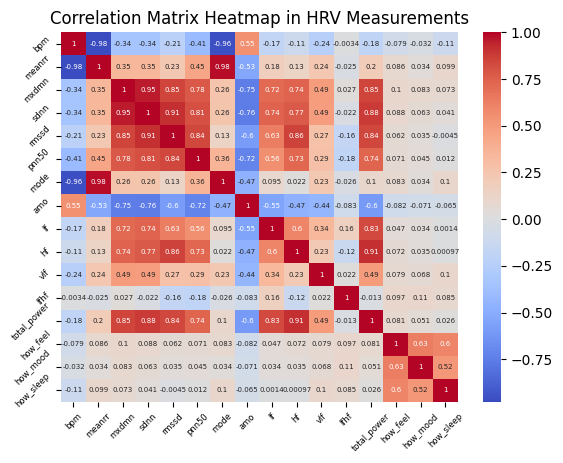

In [109]:
# Heatmap for correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.title("Correlation Matrix Heatmap in HRV Measurements")
plt.xticks(rotation=45,fontsize=6)
plt.yticks(rotation=45,fontsize=6)

plt.show()

From the correlation matrix and heatmap, we can know that there is highly negative relevance between meannrr and bpm, mode and bpm. And there is highly positive relevance between mxdmn and sdnn, sdnn and rmssd, hf and total_power, which provides information for feature dimensionality reduction.

## 3. Visualization

#### The Correlation between maxdmn and sdnn

From the correlation map and correlation matrix, we can see that there is a significant positive revelance between maxdmm and sdnn for patients with COVID-19. Now let's use scatters to explore those relationship further.

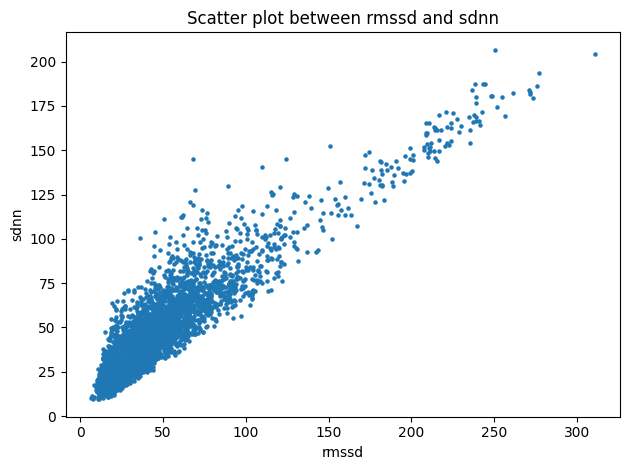

In [114]:
# only users in participants in hrv_measurements

hrv_measurements_filtered=hrv_measurements[hrv_measurements['user_code'].isin(participants['user_code'])]

plt.scatter(hrv_measurements_filtered['rmssd'],hrv_measurements_filtered['sdnn'],s=5)

plt.xlabel('rmssd')
plt.ylabel('sdnn')

plt.title('Scatter plot between rmssd and sdnn')

# reduce the effect of overlapping points
plt.tight_layout()
plt.show()

It shows that there are nearly linear relationship between these two variables. So we can conclude that there are nealy linear relationship between rmssd and sdnn for patients with COVID-19.

#### Case Study: Trends in blood pressure of user 01bad5a519 after having COVID symptoms.

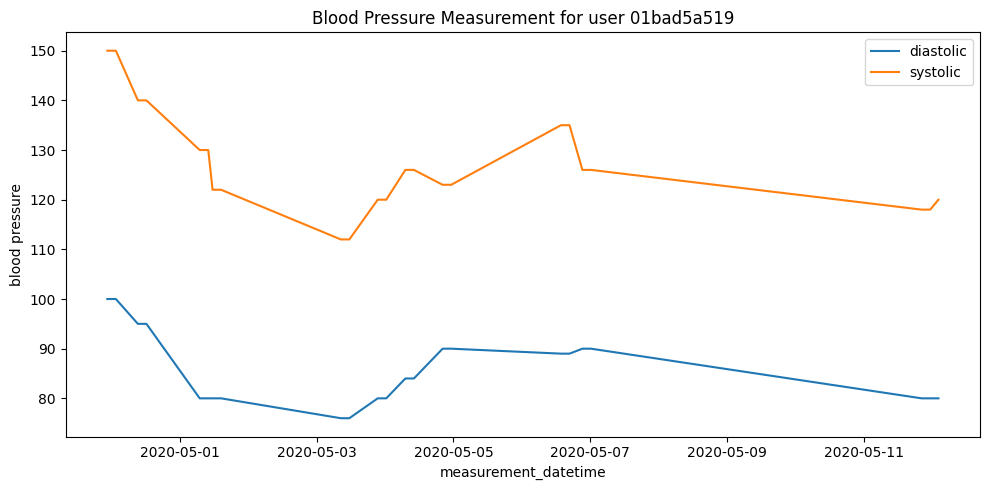

In [135]:
# get the list of blood pressure mesurements for each user

user_code='01bad5a519'

diastolic_list=blood_pressure[blood_pressure['user_code']==user_code].sort_values('measurement_datetime')['diastolic']
systolic_list=blood_pressure[blood_pressure['user_code']==user_code].sort_values('measurement_datetime')['systolic']

measurement_list=blood_pressure[blood_pressure['user_code']==user_code].sort_values('measurement_datetime')['measurement_datetime']

plt.figure(figsize=(10, 5))  # Set the width to 10 and height to 5

plt.plot(measurement_list,diastolic_list,label='diastolic')
plt.plot(measurement_list,systolic_list,label='systolic')

plt.xlabel('measurement_datetime')
plt.ylabel('blood pressure')
plt.title('Blood Pressure Measurement for user 01bad5a519')

plt.legend()

plt.tight_layout()
plt.show()

From the line chart above, we can see that the trends of diastolic and systolic of the measurement_datetime are similar. After a high diastolic and systolic in late April, there are rapid declines to the bottom of diastolic and systolic simultaneously. After 2020-05-03, there are increases of diastolic and systolic after 2020-05-03 and hit the top when datetime is 2020-05-06. After that, both diasolic and systolic slowly decrease and trend to stablize.